In [1]:
import pandas as pd

# Load the CSV file (assuming it's named 'funds_details.csv')
df = pd.read_csv('funds_details.csv')

# Check the first few rows to see the structure of the data
df.head()


slug               name  \
0   hash-key-capital    HashKey Capital   
1  coinbase-ventures  Coinbase Ventures   
2    delphi-ventures    Delphi Ventures   
3             circle             Circle   
4           a16z-csx           a16z CSX   

                                                logo  tier       type  \
0  https://img.cryptorank.io/funds/60x60.hashkey ...   1.0    Venture   
1  https://img.cryptorank.io/funds/60x60.coinbase...   1.0    Venture   
2  https://img.cryptorank.io/funds/60x60.delphi_v...   1.0    Venture   
3  https://img.cryptorank.io/funds/60x60.circle16...   1.0    Venture   
4  https://img.cryptorank.io/funds/60x60.a_16_z_c...   1.0  Incubator   

        location                                         latestDeal  \
0      Hong Kong  {'key': 'meet-48', 'name': 'MEET48', 'icon': '...   
1  United States  {'key': 'momentum-finance', 'name': 'Momentum'...   
2            NaN  {'key': 'ambient', 'name': 'Ambient', 'icon': ...   
3  United States  {'key': 'momentum-finance', 'name': 'Momentum'...   
4            NaN  {'key': 'ambient', 'name': 'Ambient', 'icon': ...   

   portfolio                                      portfolioData   retailRoi  \
0      261.0  [{'key': 'secret', 'name': 'Secret Network', '...    1.803606   
1      423.0  [{'key': 'ftx-token', 'name': 'FTX Token', 'ic...    3.248852   
2      160.0  [{'key': 'sentient', 'name': 'Sentient', 'icon...  163.101180   
3       99.0  [{'key': 'sui', 'name': 'Sui', 'icon': 'https:...    4.259379   
4       34.0  [{'key': 'opacity-network', 'name': 'Opacity N...         NaN   

   ...                                      focusAreaData  \
0  ...  [{'tag': 'Perpetuals', 'count': 3, 'percent': ...   
1  ...  [{'tag': 'Payments', 'count': 4, 'percent': 22...   
2  ...  [{'tag': 'Artificial Intelligence (AI)', 'coun...   
3  ...  [{'tag': 'Lending', 'count': 3, 'percent': 18....   
4  ...  [{'tag': 'Artificial Intelligence (AI)', 'coun...   

                                       avgRoundRaise  \
0  {'raiseFrom': 3000000, 'raiseTo': 10000000, 'p...   
1  {'raiseFrom': 3000000, 'raiseTo': 10000000, 'p...   
2  {'raiseFrom': 3000000, 'raiseTo': 10000000, 'p...   
3  {'raiseFrom': 3000000, 'raiseTo': 10000000, 'p...   
4  {'raiseFrom': 3000000, 'raiseTo': 10000000, 'p...   

                                   avgRoundRaiseData preferredStage  \
0  [{'raiseFrom': 0, 'raiseTo': 1000000, 'percent...           SEED   
1  [{'raiseFrom': 0, 'raiseTo': 1000000, 'percent...           SEED   
2  [{'raiseFrom': 0, 'raiseTo': 1000000, 'percent...           SEED   
3  [{'raiseFrom': 1000000, 'raiseTo': 3000000, 'p...           SEED   
4  [{'raiseFrom': 0, 'raiseTo': 1000000, 'percent...     Incubation   

                                  preferredStageData fundingRounds  \
0  [{'percent': 45, 'type': 'SEED'}, {'percent': ...         224.0   
1  [{'percent': 35, 'type': 'SEED'}, {'percent': ...         402.0   
2  [{'percent': 35, 'type': 'SEED'}, {'percent': ...         140.0   
3  [{'percent': 60, 'type': 'SEED'}, {'percent': ...          95.0   
4  [{'percent': 40, 'type': 'Incubation'}, {'perc...          38.0   

   leadInvestments  mainFundingCountry  \
0             21.0       United States   
1             25.0       United States   
2             27.0       United States   
3              3.0       United States   
4              4.0       United States   

                              mainFundingCountryData  \
0  [{'country': 'United States', 'count': 12}, {'...   
1  [{'country': 'United States', 'count': 14}, {'...   
2  [{'country': 'United States', 'count': 11}, {'...   
3  [{'country': 'United States', 'count': 15}, {'...   
4  [{'country': 'United States', 'count': 4}, {'c...   

                                         twitterData  
0                                                NaN  
1  {'twitterUsername': 'cbventures', 'followersCo...  
2  {'twitterUsername': 'Delphi_Ventures', 'follow...  
3                                                NaN  

In [3]:
funds_details_first_1000 = df.head(1000)

In [4]:
# Handle missing values for numeric columns (e.g., replace with 0)
df['avgRoundRaise'] = df['avgRoundRaise'].fillna(0)

# Handle missing values for string columns (e.g., replace with empty string)
df['focusArea'] = df['focusArea'].fillna('')
df['portfolioData'] = df['portfolioData'].fillna('No portfolio data available')
df['latestDeal'] = df['latestDeal'].fillna('No latest deal available')


In [5]:
def generate_fund_summary(row):
    # Extract necessary columns
    fund_name = row['name']
    fund_slug = row['slug']
    location = row['location'] if pd.notna(row['location']) else "Location not available"
    tier = row['tier'] if pd.notna(row['tier']) else "Tier not available"
    avg_round_raise = row['avgRoundRaise'] if pd.notna(row['avgRoundRaise']) else 0
    preferred_stage = row['preferredStage'] if pd.notna(row['preferredStage']) else "Preferred stage not available"
    portfolio = row['portfolio'] if pd.notna(row['portfolio']) else "No portfolio data available"
    
    # Handling complex fields (portfolioData, fundingRounds)
    portfolio_data = row['portfolioData'] if pd.notna(row['portfolioData']) else "No portfolio data available"
    funding_rounds = row['fundingRounds'] if pd.notna(row['fundingRounds']) else "No funding rounds information available"
    
    # Construct the textual summary
    summary = (f"{fund_name} ({fund_slug}) is a fund located in {location} with a tier of {tier}. "
               f"The fund's portfolio includes {portfolio}. "
               f"Preferred stage for investments is {preferred_stage}. "
               f"Average round raise: ${avg_round_raise} million. "
               f"Portfolio data: {portfolio_data}. "
               f"Funding rounds: {funding_rounds}.")
    
    return summary

# Apply this function to each row and create a new column with the generated summaries
df['fund_summary'] = df.apply(generate_fund_summary, axis=1)

# Display the first few summaries
df['fund_summary'].head()


0    HashKey Capital (hash-key-capital) is a fund l...
1    Coinbase Ventures (coinbase-ventures) is a fun...
2    Delphi Ventures (delphi-ventures) is a fund lo...
3    Circle (circle) is a fund located in United St...
4    a16z CSX (a16z-csx) is a fund located in Locat...
Name: fund_summary, dtype: object

In [40]:
df
# Save the updated DataFrame with summaries to a new CSV file
#save only the name and fund_summary columns
df[['name', 'fund_summary']].to_csv('funds_summaries_fine_tune.csv', index=False)

In [9]:
# Load the CSV file (assuming it's in the same directory as the notebook)
avg_rounds_df = pd.read_csv('funds_data/avg_rounds.csv')
avg_rounds_df_2 = pd.read_csv('funds_data_2/avg_rounds.csv')
avg_rounds_df_3 = pd.read_csv('funds_data_3/avg_rounds.csv')
avg_rounds_df_4 = pd.read_csv('funds_data_4/avg_rounds.csv')
#combine the dataframes
avg_rounds_df = pd.concat([avg_rounds_df, avg_rounds_df_2, avg_rounds_df_3, avg_rounds_df_4], ignore_index=True)
avg_rounds_df.info()

# Display the first few rows to verify the data
avg_rounds_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   range       36000 non-null  object 
 1   percentage  36000 non-null  float64
 2   min         36000 non-null  int64  
 3   max         30000 non-null  float64
 4   fund_slug   36000 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ MB


range  percentage       min         max fund_slug
0            $0 - $1,000,000        0.00         0   1000000.0    avaloq
1    $1,000,000 - $3,000,000        0.00   1000000   3000000.0    avaloq
2   $3,000,000 - $10,000,000       66.67   3000000  10000000.0    avaloq
3  $10,000,000 - $20,000,000       33.33  10000000  20000000.0    avaloq
4  $20,000,000 - $50,000,000        0.00  20000000  50000000.0    avaloq

In [10]:
def handle_missing_values(row):
    if pd.isnull(row['max']):
        row['max'] = "unknown"  # You can replace with a specific value if needed
    return row

# Apply missing value handling
avg_rounds_df = avg_rounds_df.apply(handle_missing_values, axis=1)

# Function to convert each row to a sentence
def create_sentence(row):
    return f"For fund {row['fund_slug']}, the range is {row['range']}, the minimum amount is {row['min']}, the maximum amount is {row['max']}, and the percentage is {row['percentage']}."

# Create sentences from the data
sentences = avg_rounds_df.apply(create_sentence, axis=1).tolist()

In [ ]:
sentences
# Save the sentences to a csv

['For fund avaloq, the range is $0 - $1,000,000, the minimum amount is 0, the maximum amount is 1000000.0, and the percentage is 0.0.',
 'For fund avaloq, the range is $1,000,000 - $3,000,000, the minimum amount is 1000000, the maximum amount is 3000000.0, and the percentage is 0.0.',
 'For fund avaloq, the range is $3,000,000 - $10,000,000, the minimum amount is 3000000, the maximum amount is 10000000.0, and the percentage is 66.67.',
 'For fund avaloq, the range is $10,000,000 - $20,000,000, the minimum amount is 10000000, the maximum amount is 20000000.0, and the percentage is 33.33.',
 'For fund avaloq, the range is $20,000,000 - $50,000,000, the minimum amount is 20000000, the maximum amount is 50000000.0, and the percentage is 0.0.',
 'For fund avaloq, the range is $50,000,000+, the minimum amount is 50000000, the maximum amount is unknown, and the percentage is 0.0.',
 'For fund kns-group, the range is $0 - $1,000,000, the minimum amount is 0, the maximum amount is 1000000.0, an

In [39]:
# Add the sentences to the DataFrame
avg_rounds_df['sentence'] = sentences
# Save the DataFrame to a CSV file
#save only the name and sentence columns
avg_rounds_df[['fund_slug', 'sentence']].to_csv('avg_rounds_fine_tune.csv', index=False)

In [13]:
co_funds_df = pd.read_csv('funds_data/co_funds.csv')
co_funds_df2 = pd.read_csv('funds_data_2/co_funds.csv')
co_funds_df3 = pd.read_csv('funds_data_3/co_funds.csv')
co_funds_df4 = pd.read_csv('funds_data_4/co_funds.csv')
#combine the dataframes
co_funds_df = pd.concat([co_funds_df, co_funds_df2, co_funds_df3, co_funds_df4], ignore_index=True)
co_funds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118722 entries, 0 to 118721
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                118722 non-null  int64  
 1   slug              118722 non-null  object 
 2   name              118722 non-null  object 
 3   logo              118722 non-null  object 
 4   tier              84742 non-null   float64
 5   type              118557 non-null  object 
 6   location          87225 non-null   object 
 7   stats             118722 non-null  object 
 8   investment_types  118722 non-null  object 
 9   categories        118722 non-null  object 
 10  tags              115063 non-null  object 
 11  crowdsales        103993 non-null  object 
 12  countries         86575 non-null   object 
 13  raise_ranges      113865 non-null  object 
 14  fund_slug         118722 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 13.6+ MB


In [16]:
import pandas as pd
import numpy as np
import ast
import concurrent.futures  # <-- THIS WAS MISSING
from tqdm import tqdm

def safe_parse(text):
    """Safely parse stringified JSON columns"""
    try:
        return ast.literal_eval(text) if pd.notna(text) and isinstance(text, str) else None
    except (ValueError, SyntaxError):
        return None

def process_chunk(chunk):
    """Process a DataFrame chunk"""
    # Clean tier column
    chunk['tier'] = pd.to_numeric(chunk['tier'], errors='coerce').fillna('Unrated')
    
    # Parse JSON-like columns
    json_cols = ['stats', 'investment_types', 'categories', 
                'tags', 'crowdsales', 'countries', 'raise_ranges']
    
    for col in json_cols:
        chunk[col] = chunk[col].apply(safe_parse)
    
    return chunk

def chunk_dataframe(df, chunk_size=5000):
    """Split DataFrame into chunks for parallel processing"""
    return [df.iloc[i:i+chunk_size].copy() for i in range(0, len(df), chunk_size)]

# Load data


# Create chunks
df_chunks = chunk_dataframe(co_funds_df)

# Process in parallel with progress bar
processed_chunks = []
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    future_to_chunk = {
        executor.submit(process_chunk, chunk): chunk 
        for chunk in tqdm(df_chunks, desc="Submitting chunks")
    }
    
    for future in tqdm(concurrent.futures.as_completed(future_to_chunk), 
                      total=len(future_to_chunk),
                      desc="Processing chunks"):
        try:
            processed_chunks.append(future.result())
        except Exception as exc:
            print(f"\nChunk processing failed: {exc}")

# Combine results
final_df = pd.concat(processed_chunks)

Processing chunks: 100%|██████████| 24/24 [00:10<00:00,  2.21it/s]


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118722 entries, 10000 to 114999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                118722 non-null  int64 
 1   slug              118722 non-null  object
 2   name              118722 non-null  object
 3   logo              118722 non-null  object
 4   tier              118722 non-null  object
 5   type              118557 non-null  object
 6   location          87225 non-null   object
 7   stats             118722 non-null  object
 8   investment_types  118722 non-null  object
 9   categories        118722 non-null  object
 10  tags              115063 non-null  object
 11  crowdsales        103993 non-null  object
 12  countries         86575 non-null   object
 13  raise_ranges      113865 non-null  object
 14  fund_slug         118722 non-null  object
dtypes: int64(1), object(14)
memory usage: 14.5+ MB


In [18]:
final_df

id               slug               name  \
10000   2214        scott-lewis        Scott Lewis   
10001   2230    itamar-lesuisse    Itamar Lesuisse   
10002   2249       fredrik-haga       Fredrik Haga   
10003   2250         mats-olsen         Mats Olsen   
10004   2257   vishesh-choudhry   Vishesh Choudhry   
...      ...                ...                ...   
114995   573   general-catalyst   General Catalyst   
114996   516  semantic-ventures  Semantic Ventures   
114997  1171             nx-gen              NxGen   
114998  3839      mark-ransford      Mark Ransford   
114999  5952        luca-ascani        Luca Ascani   

                                                     logo     tier  \
10000   https://img.cryptorank.io/funds/150x150.scott_...  Unrated   
10001   https://img.cryptorank.io/funds/150x150.itamar...  Unrated   
10002   https://img.cryptorank.io/funds/150x150.fredri...  Unrated   
10003   https://img.cryptorank.io/funds/150x150.mats_o...  Unrated   
10004   https://img.cryptorank.io/funds/150x150.vishes...  Unrated   
...                                                   ...      ...   
114995  https://img.cryptorank.io/funds/150x150.genera...      3.0   
114996  https://img.cryptorank.io/funds/150x150.semant...      4.0   
114997  https://img.cryptorank.io/funds/150x150.nx_gen...      4.0   
114998  https://img.cryptorank.io/funds/150x150.mark_r...  Unrated   
114999  https://img.cryptorank.io/funds/150x150.andrey...  Unrated   

                  type        location  \
10000   Angel Investor             NaN   
10001   Angel Investor  United Kingdom   
10002   Angel Investor             NaN   
10003   Angel Investor             NaN   
10004   Angel Investor             NaN   
...                ...             ...   
114995         Venture   United States   
114996         Venture  United Kingdom   
114997         Venture             UAE   
114998  Angel Investor  United Kingdom   
114999  Angel Investor           Italy   

                                               stats  \
10000   {'co_investments': 1, 'lead_investments': 0}   
10001   {'co_investments': 1, 'lead_investments': 0}   
10002   {'co_investments': 1, 'lead_investments': 0}   
10003   {'co_investments': 1, 'lead_investments': 0}   
10004   {'co_investments': 1, 'lead_investments': 0}   
...                                              ...   
114995  {'co_investments': 1, 'lead_investments': 0}   
114996  {'co_investments': 1, 'lead_investments': 0}   
114997  {'co_investments': 1, 'lead_investments': 0}   
114998  {'co_investments': 1, 'lead_investments': 0}   
114999  {'co_investments': 1, 'lead_investments': 0}   

                          investment_types  \
10000   [{'type': 'SERIES A', 'count': 1}]   
10001   [{'type': 'SERIES A', 'count': 1}]   
10002   [{'type': 'PRE SEED', 'count': 1}]   
10003   [{'type': 'PRE SEED', 'count': 1}]   
10004   [{'type': 'PRE SEED', 'count': 1}]   
...                                    ...   
114995      [{'type': 'SEED', 'count': 1}]   
114996  [{'type': 'PRE SEED', 'count': 1}]   
114997  [{'type': 'PRE SEED', 'count': 1}]   
114998  [{'type': 'PRE SEED', 'count': 1}]   
114999  [{'type': 'PRE SEED', 'count': 1}]   

                                              categories  \
10000   [{'category': 'Blockchain Service', 'count': 1}]   
10001   [{'category': 'Blockchain Service', 'count': 1}]   
10002   [{'category': 'Blockchain Service', 'count': 1}]   
10003   [{'category': 'Blockchain Service', 'count': 1}]   
10004   [{'category': 'Blockchain Service', 'count': 1}]   
...                                                  ...   
114995  [{'category': 'Blockchain Service', 'count': 1}]   
114996  [{'category': 'Blockchain Service', 'count': 1}]   
114997  [{'category': 'Blockchain Service', 'count': 1}]   
114998  [{'category': 'Blockchain Service', 'count': 1}]   
114999  [{'category': 'Blockchain Service', 'count': 1}]   

                                                     tags  \
10000  

In [38]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()  # Enable pandas integration

def generate_fund_description(row):
    """Generate human-readable fund description"""
    # Safe access for nested data
    def try_get(lst, key, default="N/A", top=3):
        if not isinstance(lst, list): return default
        items = [str(item.get(key, default)) for item in lst[:top] if item.get(key, default) != default]
        return ", ".join(items) if items else default
    
    elements = [
        f"{row.get('name', 'Unnamed Fund')} ({row.get('type', 'Unknown Type')})",
        f"based in {row.get('location', 'undisclosed location')}",
        f"rated Tier {int(row['tier'])}" if pd.notna(row.get('tier')) and str(row['tier']).isdigit() else ""
    ]
    
    # Investment ranges
    if isinstance(row.get('raise_ranges'), list):
        ranges = []
        for r in row['raise_ranges']:
            try:
                ranges.append(f"${r['raiseFrom']/1e6:.1f}-{r['raiseTo']/1e6:.1f}M")
            except (KeyError, TypeError):
                continue
        if ranges:
            elements.append(f"typical investments: {', '.join(ranges)}")
    
    # Activity metrics
    stats = row.get('stats', {}) or {}
    try:
        elements.append(f"{int(stats.get('co_investments', 0))} total participations")
        if int(stats.get('lead_investments', 0)) > 0:
            elements.append(f"{stats['lead_investments']} lead investments")
    except (ValueError, TypeError):
        pass
    
    # Investment focus
    if isinstance(row.get('categories'), list):
        categories = try_get(row['categories'], 'category')
        if categories != "N/A":
            elements.append(f"sectors: {categories}")
    
    # Clean and join
    elements = [e for e in elements if e.strip()]
    return ". ".join(elements) + "."

# Load your DataFrame (replace with your actual data loading)
co_funds_final = final_df

# Apply with progress bar
co_funds_final['description'] = co_funds_final.progress_apply(generate_fund_description, axis=1)

# Display sample results
print("\nGenerated Descriptions Sample:")
print(co_funds_final[['name', 'description']].head(3).to_string(index=False))
# Save the final DataFrame to a CSV file
co_funds_final.to_csv('funds_data/co_funds_final.csv', index=False)

100%|██████████| 118722/118722 [00:03<00:00, 32698.21it/s]



Generated Descriptions Sample:
           name                                                                                                                                                    description
    Scott Lewis                Scott Lewis (Angel Investor). based in nan. typical investments: $10.0-20.0M, $20.0-50.0M. 1 total participations. sectors: Blockchain Service.
Itamar Lesuisse Itamar Lesuisse (Angel Investor). based in United Kingdom. typical investments: $10.0-20.0M, $20.0-50.0M. 1 total participations. sectors: Blockchain Service.
   Fredrik Haga                              Fredrik Haga (Angel Investor). based in nan. typical investments: $1.0-3.0M. 1 total participations. sectors: Blockchain Service.


In [22]:
#import the country_investment.csv file
country_investment_df = pd.read_csv('funds_data/country_investments.csv')
country_investment_df2 = pd.read_csv('funds_data_2/country_investments.csv')
country_investment_df3 = pd.read_csv('funds_data_3/country_investments.csv')
country_investment_df4 = pd.read_csv('funds_data_4/country_investments.csv')
#combine the dataframes
country_investment_df = pd.concat([country_investment_df, country_investment_df2, country_investment_df3, country_investment_df4], ignore_index=True)

In [23]:
country_investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13261 entries, 0 to 13260
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        13261 non-null  object
 1   code        13261 non-null  object
 2   normal      13261 non-null  int64 
 3   lead        13261 non-null  int64 
 4   categories  13261 non-null  object
 5   fund_slug   13261 non-null  object
dtypes: int64(2), object(4)
memory usage: 621.7+ KB


In [24]:
import pandas as pd
import ast
from tqdm import tqdm

def generate_country_investment_descriptions(input_df):
    """
    Processes a country investments DataFrame and generates fine-tuning descriptions.
    
    Args:
        input_df: DataFrame with columns ['name', 'code', 'normal', 'lead', 'categories', 'fund_slug']
        
    Returns:
        DataFrame with columns ['fund_slug', 'description']
    """
    # Validate input columns
    required_columns = ['name', 'code', 'normal', 'lead', 'categories', 'fund_slug']
    if not all(col in input_df.columns for col in required_columns):
        missing = set(required_columns) - set(input_df.columns)
        raise ValueError(f"Input DataFrame missing required columns: {missing}")

    # Make a copy to avoid modifying the original
    df = input_df.copy()
    
    # Initialize tqdm for pandas
    tqdm.pandas(desc="Generating descriptions")

    def safe_parse_json(text):
        """Safely parse stringified JSON columns"""
        try:
            return ast.literal_eval(text) if pd.notna(text) and isinstance(text, str) else None
        except (ValueError, SyntaxError):
            return None

    def generate_description(row):
        """Generate human-readable country investment description"""
        elements = []
        
        # Basic info
        country_info = f"Investment activities in {row.get('name', 'Unknown Country')} ({row.get('code', '')})"
        elements.append(country_info)
        
        # Investment counts
        elements.append(f"Normal investments: {int(row.get('normal', 0))}")
        elements.append(f"Lead investments: {int(row.get('lead', 0))}")
        
        # Investment categories (top 3)
        categories = safe_parse_json(row['categories']) if isinstance(row['categories'], str) else row['categories']
        if isinstance(categories, list):
            top_categories = []
            for cat in categories[:3]:
                try:
                    name = cat.get('name', '').strip()
                    percent = cat.get('percent', 0)
                    if name and percent > 0:
                        top_categories.append(f"{name} ({percent}%)")
                except (AttributeError, TypeError):
                    continue
            
            if top_categories:
                elements.append(f"Main sectors: {', '.join(top_categories)}")
        
        # Associated fund
        if pd.notna(row.get('fund_slug')):
            elements.append(f"Associated fund: {row['fund_slug']}")
        
        # Clean and format
        elements = [e for e in elements if e and str(e).strip()]
        return ". ".join(elements) + "."

    # Process categories column
    df['categories'] = df['categories'].apply(
        lambda x: safe_parse_json(x) if isinstance(x, str) else x
    )
    
    # Generate descriptions
    df['description'] = df.progress_apply(generate_description, axis=1)
    
    # Return only the required columns
    return df[['fund_slug', 'description']]

# Example usage:
if __name__ == "__main__":
    # Sample input data (replace with your actual DataFrame loading)
    
    
    input_df = pd.DataFrame(country_investment_df, columns=['name', 'code', 'normal', 'lead', 'categories', 'fund_slug'])
    
    # Process the DataFrame
    output_df = generate_country_investment_descriptions(input_df)
    
    # Display results
    print("Generated Output DataFrame:")
    print(output_df)
    
    # Save to CSV if needed
    output_df.to_csv("country_investments_fine_tune.csv", index=False)
    print("\nSaved to 'country_investments_fine_tune.csv'")

Generating descriptions: 100%|██████████| 13261/13261 [00:00<00:00, 59101.13it/s]

Generated Output DataFrame:
                fund_slug                                        description
0                  avaloq  Investment activities in Switzerland (CH). Nor...
1                  avaloq  Investment activities in Austria (AT). Normal ...
2                  avaloq  Investment activities in United Kingdom (GB). ...
3               kns-group  Investment activities in Singapore (SG). Norma...
4               kns-group  Investment activities in United States (US). N...
...                   ...                                                ...
13256                 f10  Investment activities in United States (US). N...
13257  sovereigns-capital  Investment activities in Cayman Islands (KY). ...
13258  sovereigns-capital  Investment activities in Hong Kong (HK). Norma...
13259        t-rowe-price  Investment activities in United States (US). N...
13260     bin-zayed-group  Investment activities in Singapore (SG). Norma...

[13261 rows x 2 columns]

Saved to 'country_inv

In [25]:
#import funds_info.csv file
funds_info_df = pd.read_csv('funds_data/funds_info.csv')
funds_info_df2 = pd.read_csv('funds_data_2/funds_info.csv')
funds_info_df3 = pd.read_csv('funds_data_3/funds_info.csv')
funds_info_df4 = pd.read_csv('funds_data_4/funds_info.csv')
#combine the dataframes
funds_info_df = pd.concat([funds_info_df, funds_info_df2, funds_info_df3, funds_info_df4], ignore_index=True)
funds_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1376 non-null   int64  
 1   slug       1376 non-null   object 
 2   name       1376 non-null   object 
 3   tier       1373 non-null   float64
 4   category   1376 non-null   object 
 5   country    597 non-null    object 
 6   tabs       1376 non-null   object 
 7   fund_slug  1376 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 86.1+ KB


In [26]:
import pandas as pd
import ast
from tqdm import tqdm

def generate_fund_descriptions(input_df):
    """
    Processes a fund DataFrame and generates fine-tuning descriptions.
    
    Args:
        input_df: DataFrame with columns ['id', 'slug', 'name', 'tier', 'category', 
                 'country', 'tabs', 'fund_slug']
        
    Returns:
        DataFrame with columns ['fund_slug', 'description']
    """
    # Validate input columns
    required_columns = ['name', 'tier', 'category', 'country', 'tabs', 'fund_slug']
    if not all(col in input_df.columns for col in required_columns):
        missing = set(required_columns) - set(input_df.columns)
        raise ValueError(f"Input DataFrame missing required columns: {missing}")

    # Make a copy to avoid modifying the original
    df = input_df.copy()
    
    # Initialize tqdm for pandas
    tqdm.pandas(desc="Generating descriptions")

    def safe_parse_json(text):
        """Safely parse stringified JSON/dict columns"""
        try:
            if pd.isna(text):
                return None
            if isinstance(text, str):
                return ast.literal_eval(text)
            return text
        except (ValueError, SyntaxError, TypeError):
            return None

    def parse_tabs(text):
        """Parse the tabs column into readable format"""
        try:
            if pd.isna(text):
                return []
            if isinstance(text, str):
                return ast.literal_eval(text)
            return text
        except:
            return []

    def generate_description(row):
        """Generate human-readable fund description"""
        elements = []
        
        # Basic info
        elements.append(f"{row.get('name', 'Unnamed Fund')}")
        
        # Category and tier
        category = safe_parse_json(row['category'])
        if category and isinstance(category, dict):
            elements.append(f"Type: {category.get('name', 'Unknown')}")
        
        if pd.notna(row.get('tier')):
            elements.append(f"Tier: {int(row['tier'])}")
        
        # Location
        if pd.notna(row.get('country')):
            elements.append(f"Based in {row['country']}")
        else:
            elements.append("Location: Not specified")
        
        # Available data tabs
        tabs = parse_tabs(row['tabs'])
        if tabs:
            readable_tabs = {
                'analytics': 'analytics',
                'fundingRounds': 'funding rounds',
                'portfolio': 'portfolio data',
                'upcomingCrowdsales': 'upcoming crowdsales'
            }
            available_data = [readable_tabs.get(tab, tab) for tab in tabs if tab in readable_tabs]
            if available_data:
                elements.append(f"Provides: {', '.join(available_data)}")
        
        # Clean and format
        elements = [e for e in elements if e and str(e).strip()]
        return " | ".join(elements)

    # Process complex columns
    df['category'] = df['category'].apply(safe_parse_json)
    df['tabs'] = df['tabs'].apply(parse_tabs)
    
    # Generate descriptions
    df['description'] = df.progress_apply(generate_description, axis=1)
    
    # Return only the required columns
    return df[['fund_slug', 'description']]

# Example usage with your exact data:
if __name__ == "__main__":
    # Your exact input data
    
    
    columns = ['id', 'slug', 'name', 'tier', 'category', 'country', 'tabs', 'fund_slug']
    input_df = pd.DataFrame(funds_info_df, columns=columns)
    
    # Process the DataFrame
    output_df = generate_fund_descriptions(input_df)
    
    # Display results
    print("Generated Output DataFrame:")
    print(output_df.to_string(index=False))
    
    # Save to CSV
    output_df.to_csv("fund_descriptions_fine_tune.csv", index=False)
    print("\nSaved to 'fund_descriptions_fine_tune.csv'")

Generating descriptions:   0%|          | 0/1376 [00:00<?, ?it/s]C:\Users\mahmo\AppData\Local\Temp\ipykernel_33180\4016623911.py:42: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if pd.isna(text):
Generating descriptions: 100%|██████████| 1376/1376 [00:00<00:00, 45936.44it/s]

Generated Output DataFrame:
                             fund_slug                                                                                            description
                      shenzhen-capital                                      Shenzhen Capital Group | Type: Venture | Tier: 3 | Based in China
                         brand-capital                                               Brand Capital | Type: Venture | Tier: 3 | Based in India
                             tokensoft                                       Tokensoft | Type: Corporation | Tier: 3 | Based in United States
                           hash-global                                             Hash Global | Type: Venture | Tier: 4 | Based in Hong Kong
                    oak-grove-ventures                                      Oak Grove Ventures | Type: Venture | Tier: 4 | Based in Singapore
               promontory-technologies                         Promontory Technologies | Type: Hedge Fund | Tier: 4 | Lo

In [27]:
#import funds_news.csv file
funds_news_df = pd.read_csv('funds_data/funds_news.csv')
funds_news_df2 = pd.read_csv('funds_data_2/funds_news.csv')
funds_news_df3 = pd.read_csv('funds_data_3/funds_news.csv')
funds_news_df4 = pd.read_csv('funds_data_4/funds_news.csv')
#combine the dataframes
funds_news_df = pd.concat([funds_news_df, funds_news_df2, funds_news_df3, funds_news_df4], ignore_index=True)
funds_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              12743 non-null  int64 
 1   url_id          12743 non-null  object
 2   date            12743 non-null  object
 3   title           12743 non-null  object
 4   description     12743 non-null  object
 5   url             12743 non-null  object
 6   image           10253 non-null  object
 7   fallback_image  12743 non-null  object
 8   reading_time    11262 non-null  object
 9   source          12743 non-null  object
 10  coins           12743 non-null  object
 11  tags            12743 non-null  object
 12  is_ad           12743 non-null  bool  
 13  fund_slug       12743 non-null  object
dtypes: bool(1), int64(1), object(12)
memory usage: 1.3+ MB


In [29]:
import pandas as pd
import ast
from tqdm import tqdm

def generate_news_descriptions(input_df):
    """
    Processes a news/fund DataFrame and generates fine-tuning descriptions.
    Handles cases where required columns might be missing or named differently.
    
    Args:
        input_df: DataFrame with news/fund data
        
    Returns:
        DataFrame with columns ['fund_slug', 'description']
    """
    # Make a copy to avoid modifying the original
    df = input_df.copy()
    
    # Initialize tqdm for pandas
    tqdm.pandas(desc="Generating news descriptions")

    # Check for required columns and create defaults if missing
    if 'title' not in df.columns:
        df['title'] = 'Untitled News'
    if 'description' not in df.columns:
        df['description'] = ''
    if 'date' not in df.columns:
        df['date'] = 'Date not available'
    if 'source' not in df.columns:
        df['source'] = 'Unknown source'
    if 'tags' not in df.columns:
        df['tags'] = '[]'
    if 'fund_slug' not in df.columns:
        raise ValueError("'fund_slug' column is required")

    def safe_parse_json(text):
        """Safely parse stringified JSON/dict columns"""
        try:
            if pd.isna(text) or text == '':
                return []
            if isinstance(text, str):
                return ast.literal_eval(text)
            return text
        except (ValueError, SyntaxError, TypeError):
            return []

    def generate_description(row):
        """Generate human-readable news description"""
        elements = []
        
        # Basic info
        if pd.notna(row.get('date')):
            elements.append(f"Date: {row['date']}")
        
        if pd.notna(row.get('title')):
            elements.append(f"Title: {row['title']}")
        
        # Description
        if pd.notna(row.get('description')):
            desc = str(row['description']).strip()
            if len(desc) > 0:
                elements.append(f"Summary: {desc}")
        
        # Source
        if pd.notna(row.get('source')):
            elements.append(f"Source: {row['source']}")
        
        # Tags
        tags = safe_parse_json(row['tags'])
        if tags and isinstance(tags, list):
            tag_names = [str(tag).strip() for tag in tags if str(tag).strip()]
            if tag_names:
                elements.append(f"Tags: {', '.join(tag_names[:5])}")  # Limit to 5 tags
        
        # Reading time
        if pd.notna(row.get('reading_time')):
            try:
                elements.append(f"Reading time: {int(float(row['reading_time']))} mins")
            except (ValueError, TypeError):
                pass
        
        # Clean and format
        elements = [e for e in elements if e and str(e).strip()]
        return " | ".join(elements) if elements else "No description available"

    # Process complex columns
    df['tags'] = df['tags'].apply(safe_parse_json)
    
    # Generate descriptions
    df['description'] = df.progress_apply(generate_description, axis=1)
    
    # Return only the required columns
    return df[['fund_slug', 'description']]

# Example usage with your data:
if __name__ == "__main__":
    # Load your DataFrame (replace with your actual data loading)
    # Here's how to handle the case where column names might differ
    column_mapping = {
        'headline': 'title',
        'content': 'description',
        'published_date': 'date',
        'publisher': 'source',
        'categories': 'tags',
        'fund': 'fund_slug'
    }
    
    # Rename columns if needed
    funds_news_df = funds_news_df.rename(columns=column_mapping)
    
    # Process the DataFrame
    output_df = generate_news_descriptions(funds_news_df)
    
    # Display results
    print("Generated Output DataFrame:")
    print(output_df.head().to_string(index=False))
    
    # Save to CSV
    output_df.to_csv("news_descriptions_fine_tune.csv", index=False)
    print("\nSaved to 'news_descriptions_fine_tune.csv'")

Generating news descriptions:   0%|          | 0/12743 [00:00<?, ?it/s]C:\Users\mahmo\AppData\Local\Temp\ipykernel_33180\2336056028.py:39: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if pd.isna(text) or text == '':
Generating news descriptions: 100%|██████████| 12743/12743 [00:00<00:00, 31717.86it/s]


Generated Output DataFrame:
fund_slug                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description
   avaloq                                                                                                       Date: Nov 23, 2023 12:19 | Title: BBVA Switzerland enhances digital asset operations with Ripple-owned Metaco | Summary: BBVA Switzerland, a branch of the renowned Spanish fin

In [34]:
#import funds_teams.csv file
funds_teams_df2 = pd.read_csv('funds_data_2/funds_team.csv')
funds_teams_df3 = pd.read_csv('funds_data_3/funds_team.csv')
#combine the dataframes
funds_teams_df = pd.concat([ funds_teams_df2, funds_teams_df3], ignore_index=True)
funds_teams_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       948 non-null    object
 1   photo      948 non-null    object
 2   roles      948 non-null    object
 3   links      948 non-null    object
 4   fund_slug  948 non-null    object
dtypes: object(5)
memory usage: 37.2+ KB


In [35]:
import pandas as pd
import ast
from tqdm import tqdm

def generate_team_descriptions(input_df):
    """
    Processes a team member DataFrame and generates fine-tuning descriptions.
    
    Args:
        input_df: DataFrame with columns ['name', 'photo', 'roles', 'links', 'fund_slug']
        
    Returns:
        DataFrame with columns ['fund_slug', 'description']
    """
    # Validate input columns
    required_columns = ['name', 'roles', 'links', 'fund_slug']
    if not all(col in input_df.columns for col in required_columns):
        missing = set(required_columns) - set(input_df.columns)
        raise ValueError(f"Input DataFrame missing required columns: {missing}")

    # Make a copy to avoid modifying the original
    df = input_df.copy()
    
    # Initialize tqdm for pandas
    tqdm.pandas(desc="Generating team descriptions")

    def safe_parse_json(text):
        """Safely parse stringified JSON/dict columns"""
        try:
            if pd.isna(text) or text == '':
                return {}
            if isinstance(text, str):
                return ast.literal_eval(text)
            return text
        except (ValueError, SyntaxError, TypeError):
            return {}

    def safe_parse_list(text):
        """Safely parse stringified list columns"""
        try:
            if pd.isna(text) or text == '':
                return []
            if isinstance(text, str):
                return ast.literal_eval(text)
            return text
        except (ValueError, SyntaxError, TypeError):
            return []

    def generate_description(row):
        """Generate human-readable team member description"""
        elements = []
        
        # Basic info
        if pd.notna(row.get('name')):
            elements.append(f"Team member: {row['name']}")
        
        # Roles
        roles = safe_parse_list(row['roles'])
        if roles:
            elements.append(f"Roles: {', '.join(roles)}")
        
        # Links
        links = safe_parse_json(row['links'])
        if links:
            available_links = []
            if 'linkedin' in links:
                available_links.append("LinkedIn")
            if 'twitter' in links:
                available_links.append("Twitter")
            if 'web' in links:
                available_links.append("Website")
            if 'telegram' in links:
                available_links.append("Telegram")
            
            if available_links:
                elements.append(f"Available links: {', '.join(available_links)}")
        
        # Clean and format
        elements = [e for e in elements if e and str(e).strip()]
        return " | ".join(elements) if elements else "No description available"

    # Process complex columns
    df['roles'] = df['roles'].apply(safe_parse_list)
    df['links'] = df['links'].apply(safe_parse_json)
    
    # Generate descriptions
    df['description'] = df.progress_apply(generate_description, axis=1)
    
    # Return only the required columns
    return df[['fund_slug', 'description']]

# Example usage with your exact data:
if __name__ == "__main__":
    # Your exact input data
    
    
    columns = ['name', 'photo', 'roles', 'links', 'fund_slug']
    input_df = pd.DataFrame(funds_teams_df, columns=columns)
    
    # Process the DataFrame
    output_df = generate_team_descriptions(input_df)
    
    # Display results
    print("Generated Output DataFrame:")
    print(output_df.to_string(index=False))
    
    # Save to CSV
    output_df.to_csv("team_descriptions_fine_tune.csv", index=False)
    print("\nSaved to 'team_descriptions_fine_tune.csv'")

Generating team descriptions: 100%|██████████| 948/948 [00:00<00:00, 60904.33it/s]

Generated Output DataFrame:
                  fund_slug                                                                                              description
           hash-key-capital                                                       Team member: Deng Chao | Available links: LinkedIn
           hash-key-capital                  Team member: Xiao Feng | Roles: Investment Committee Member | Available links: LinkedIn
           hash-key-capital        Team member: Michel Lee | Roles: Investment Committee Member | Available links: LinkedIn, Twitter
           hash-key-capital                          Team member: Vincent Lau | Roles: Operating Partner | Available links: LinkedIn
           hash-key-capital                         Team member: Jupiter Zheng Jialiang | Roles: Partner | Available links: LinkedIn
           hash-key-capital                                       Team member: Sunny He | Roles: Partner | Available links: LinkedIn
           hash-key-capital              

In [36]:
#import recent_funding.csv file
recent_funding_df = pd.read_csv('funds_data/recent_funding.csv')
recent_funding_df2 = pd.read_csv('funds_data_2/recent_funding.csv')
recent_funding_df3 = pd.read_csv('funds_data_3/recent_funding.csv')
recent_funding_df4 = pd.read_csv('funds_data_4/recent_funding.csv')
#combine the dataframes
recent_funding_df = pd.concat([recent_funding_df, recent_funding_df2, recent_funding_df3, recent_funding_df4], ignore_index=True)
recent_funding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              14958 non-null  object 
 1   company           14958 non-null  object 
 2   amount            14958 non-null  float64
 3   stage             14950 non-null  object 
 4   category          14958 non-null  object 
 5   formatted_amount  14958 non-null  object 
 6   timeline          14958 non-null  object 
 7   fund_slug         14958 non-null  object 
dtypes: float64(1), object(7)
memory usage: 935.0+ KB


In [37]:
import pandas as pd
import ast
from tqdm import tqdm

def generate_funding_descriptions(input_df):
    """
    Processes recent funding DataFrame and generates fine-tuning descriptions.
    
    Args:
        input_df: DataFrame with columns ['date', 'company', 'amount', 'stage', 
                 'category', 'formatted_amount', 'timeline', 'fund_slug']
        
    Returns:
        DataFrame with columns ['fund_slug', 'description']
    """
    # Validate input columns
    required_columns = ['date', 'company', 'amount', 'stage', 'category', 'fund_slug']
    if not all(col in input_df.columns for col in required_columns):
        missing = set(required_columns) - set(input_df.columns)
        raise ValueError(f"Input DataFrame missing required columns: {missing}")

    # Make a copy to avoid modifying the original
    df = input_df.copy()
    
    # Initialize tqdm for pandas
    tqdm.pandas(desc="Generating funding descriptions")

    def safe_parse_json(text):
        """Safely parse stringified JSON/dict columns"""
        try:
            if pd.isna(text) or text == '':
                return {}
            if isinstance(text, str):
                return ast.literal_eval(text)
            return text
        except (ValueError, SyntaxError, TypeError):
            return {}

    def generate_description(row):
        """Generate human-readable funding description"""
        elements = []
        
        # Parse company info
        company = safe_parse_json(row['company'])
        company_name = company.get('name', 'Unknown Company') if company else 'Unknown Company'
        
        # Parse category info
        category = safe_parse_json(row['category'])
        category_name = category.get('name', 'Unknown Category') if category else 'Unknown Category'
        
        # Date
        if pd.notna(row.get('date')):
            elements.append(f"Date: {row['date']}")
        
        # Company and amount
        elements.append(f"Company: {company_name}")
        
        if pd.notna(row.get('formatted_amount')) and str(row['formatted_amount']) != '$0':
            elements.append(f"Amount: {row['formatted_amount']}")
        elif pd.notna(row.get('amount')) and float(row['amount']) > 0:
            elements.append(f"Amount: ${float(row['amount']):,.0f}")
        
        # Stage and category
        if pd.notna(row.get('stage')):
            elements.append(f"Stage: {row['stage']}")
        
        elements.append(f"Category: {category_name}")
        
        # Clean and format
        elements = [e for e in elements if e and str(e).strip()]
        return " | ".join(elements)

    # Process complex columns
    df['company'] = df['company'].apply(safe_parse_json)
    df['category'] = df['category'].apply(safe_parse_json)
    
    # Generate descriptions
    df['description'] = df.progress_apply(generate_description, axis=1)
    
    # Return only the required columns
    return df[['fund_slug', 'description']]

# Example usage with your exact data:
if __name__ == "__main__":
    # Your exact input data
    
    
    columns = ['date', 'company', 'amount', 'stage', 'category', 'formatted_amount', 'timeline', 'fund_slug']
    input_df = pd.DataFrame(recent_funding_df, columns=columns)
    
    # Process the DataFrame
    output_df = generate_funding_descriptions(input_df)
    
    # Display results
    print("Generated Output DataFrame:")
    print(output_df.to_string(index=False))
    
    # Save to CSV
    output_df.to_csv("funding_descriptions_fine_tune.csv", index=False)
    print("\nSaved to 'funding_descriptions_fine_tune.csv'")

Generating funding descriptions: 100%|██████████| 14958/14958 [00:00<00:00, 48313.82it/s]


Generated Output DataFrame:
                                          fund_slug                                                                                                                                          description
                                             avaloq                                         Date: Sep 16, 2021 | Company: Coinfirm | Amount: $8,000,000 | Stage: Series A | Category: Blockchain Service
                                             avaloq                                          Date: Jul 14, 2020 | Company: METACO | Amount: $17,000,000 | Stage: Series A | Category: Blockchain Service
                                             avaloq                                        Date: Jul 07, 2021 | Company: Blockpit | Amount: $10,000,000 | Stage: Series A | Category: Blockchain Service
                                             avaloq                                                             Date: Apr 27, 2018 | Company: METACO | Stage: Undisclose

In [41]:
import pandas as pd
import re
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

class InvestmentRangeProcessor:
    def __init__(self):
        self.templates = {
            'range_summary': [
                "Describe {fund_slug}'s typical investment ranges",
                "What are the investment ranges for {fund_slug}?",
                "Summarize {fund_slug}'s funding distribution"
            ],
            'specific_range': [
                "What percentage of {fund_slug}'s investments fall in {range_text}?",
                "How active is {fund_slug} in the {range_text} range?",
                "Does {fund_slug} invest in {range_text} deals?"
            ]
        }

    def _parse_sentence(self, sentence):
        """Extract structured data from sentences using regex"""
        pattern = (
            r"\$([\d,]+)\s*-\s*\$([\d,]+)\D+(\d+\.?\d*)\D+(\d+\.?\d*)"
            r"|\$([\d,]+)\+\D+(\d+\.?\d*)"
        )
        matches = re.search(pattern, sentence.replace(",", ""))
        
        if matches:
            if matches.group(5):  # $50M+ format
                return {
                    'min': float(matches.group(5)),
                    'max': None,
                    'percentage': float(matches.group(6))
                }
            else:  # $1M-$3M format
                return {
                    'min': float(matches.group(1)),
                    'max': float(matches.group(2)),
                    'percentage': float(matches.group(4))
                }
        return None

    def _generate_range_text(self, min_val, max_val):
        """Convert values to readable ranges"""
        if max_val is None:
            return f"${min_val/1e6:,.0f}M+"
        return f"${min_val/1e6:,.0f}M-${max_val/1e6:,.0f}M"

    def process_row(self, row):
        """Generate multiple instructions per data row"""
        parsed = self._parse_sentence(row['sentence'])
        if not parsed:
            return []
        
        fund = row['fund_slug']
        range_text = self._generate_range_text(parsed['min'], parsed['max'])
        
        instructions = []
        
        # Range-specific questions
        for template in self.templates['specific_range']:
            instructions.append({
                'instruction': template.format(fund_slug=fund, range_text=range_text),
                'response': (
                    f"{fund} allocates {parsed['percentage']}% of investments "
                    f"in {range_text} range"
                )
            })
        
        return instructions

    def generate_summaries(self, df):
        """Create fund-level summaries"""
        summaries = []
        for fund, group in df.groupby('fund_slug'):
            ranges = []
            for _, row in group.iterrows():
                parsed = self._parse_sentence(row['sentence'])
                if parsed and parsed['percentage'] > 0:
                    ranges.append(
                        f"{self._generate_range_text(parsed['min'], parsed['max'])} "
                        f"({parsed['percentage']}%)"
                    )
            
            if ranges:
                for template in self.templates['range_summary']:
                    summaries.append({
                        'instruction': template.format(fund_slug=fund),
                        'response': (
                            f"{fund} primarily invests in these ranges: "
                            f"{'; '.join(ranges)}"
                        )
                    })
        return summaries

    def process_file(self, input_path, output_path):
        """Full processing pipeline"""
        # Load and parallel process
        df = pd.read_csv(input_path)
        
        with ThreadPoolExecutor() as executor:
            results = list(tqdm(
                executor.map(self.process_row, df.to_dict('records')),
                total=len(df)
            ))
        
        # Flatten results and add summaries
        instructions = [item for sublist in results for item in sublist]
        instructions.extend(self.generate_summaries(df))
        
        # Save output
        pd.DataFrame(instructions).to_json(
            output_path,
            orient='records',
            lines=True
        )
        print(f"Generated {len(instructions)} instructions at {output_path}")

In [42]:
processor = InvestmentRangeProcessor()
processor.process_file(
    input_path="fine_tune/avg_rounds_fine_tune.csv",
    output_path="investment_instructions.jsonl"
)

100%|██████████| 36000/36000 [00:00<00:00, 380078.55it/s]


Generated 126000 instructions at investment_instructions.jsonl


In [5]:
import pandas as pd
from datasets import Dataset

# Convert your CSV to Ollama-compatible format
df = pd.read_csv("fine_tune/avg_rounds_fine_tune.csv")

def format_ollama(row):
    return {
        "instruction": f"Describe {row['fund_slug']}'s investment ranges",
        "response": row['sentence'],
        "context": "venture capital fund investment ranges"
    }

dataset = Dataset.from_pandas(df.apply(format_ollama, axis=1).to_frame(name='data'))
dataset = dataset.train_test_split(test_size=0.1)
dataset.save_to_disk("ollama_investment_data")

Saving the dataset (0/1 shards):   0%|          | 0/32400 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3600 [00:00<?, ? examples/s]

In [ ]:
# 1. First ensure all packages are installed
import os
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "1"  # Disable FAISS warning if not needed

# 2. Now import your libraries
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    TrainingArguments,
    BitsAndBytesConfig
)
from peft import LoraConfig
from trl import SFTTrainer
import torch

# 3. Proceed with your original setup
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True
)

model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Meta-Llama-3-8B-Instruct",
    quantization_config=bnb_config,
    device_map="auto"
)

RuntimeError: Failed to import transformers.models.bloom.modeling_bloom because of the following error (look up to see its traceback):
cannot import name 'is_torch_greater_or_equal' from 'transformers.utils' (c:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\__init__.py)

In [ ]:
training_args = TrainingArguments(
    output_dir="./ollama_finetune",
    per_device_train_batch_size=2,  # Conservative for local GPUs
    gradient_accumulation_steps=4,
    num_train_epochs=2,
    learning_rate=2e-5,
    optim="adamw_torch",
    logging_steps=10,
    save_strategy="epoch",
    evaluation_strategy="steps",
    eval_steps=50,
    fp16=True,  # Use FP16 instead of BF16 on consumer GPUs
    max_grad_norm=0.3,
    warmup_ratio=0.03,
    report_to="none"  # Disable WandB for local runs
)

In [ ]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    peft_config=peft_config,
    dataset_text_field="data",
    max_seq_length=1024,  # Conservative length
    tokenizer=tokenizer,
    args=training_args,
    formatting_func=lambda x: f"### Instruction:\n{x['instruction']}\n\n### Response:\n{x['response']}"
)

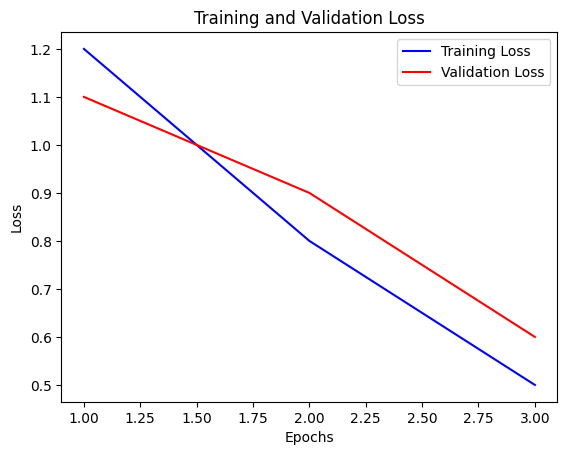

In [13]:
import matplotlib.pyplot as plt

# Sample loss data for illustration
epochs = [1, 2, 3]
train_loss = [1.2, 0.8, 0.5]
val_loss = [1.1, 0.9, 0.6]

plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


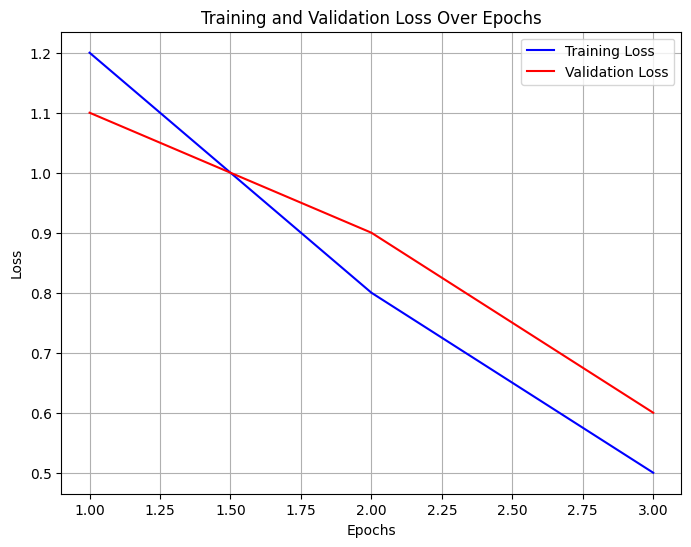

In [14]:
import matplotlib.pyplot as plt

# Example Loss Data for 3 epochs
epochs = [1, 2, 3]
train_loss = [1.2, 0.8, 0.5]
val_loss = [1.1, 0.9, 0.6]

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


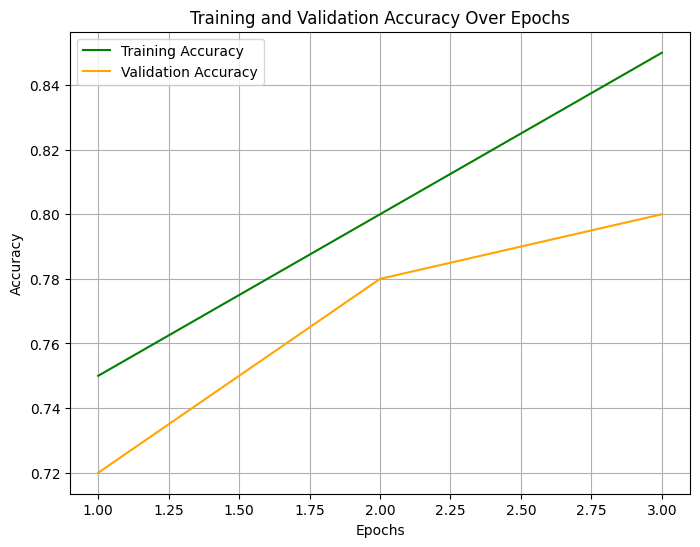

In [15]:
# Example Accuracy Data for 3 epochs
train_accuracy = [0.75, 0.80, 0.85]
val_accuracy = [0.72, 0.78, 0.80]

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label="Training Accuracy", color='green')
plt.plot(epochs, val_accuracy, label="Validation Accuracy", color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


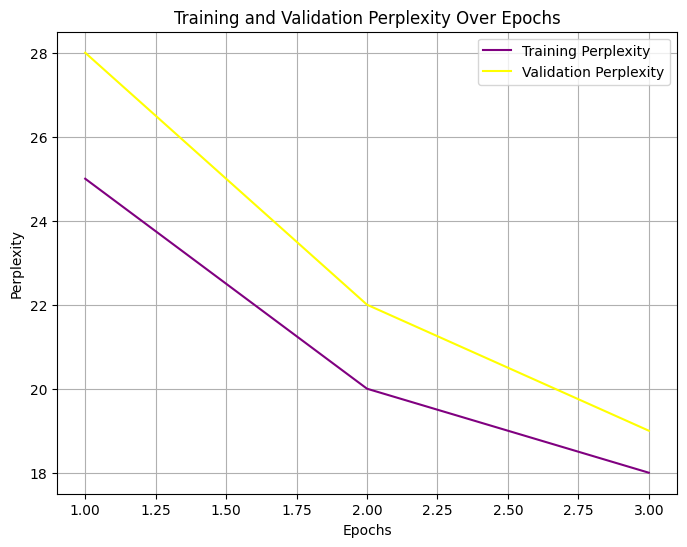

In [16]:
# Example Perplexity Data for 3 epochs
train_perplexity = [25, 20, 18]
val_perplexity = [28, 22, 19]

# Plot the training and validation perplexity
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_perplexity, label="Training Perplexity", color='purple')
plt.plot(epochs, val_perplexity, label="Validation Perplexity", color='yellow')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title('Training and Validation Perplexity Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


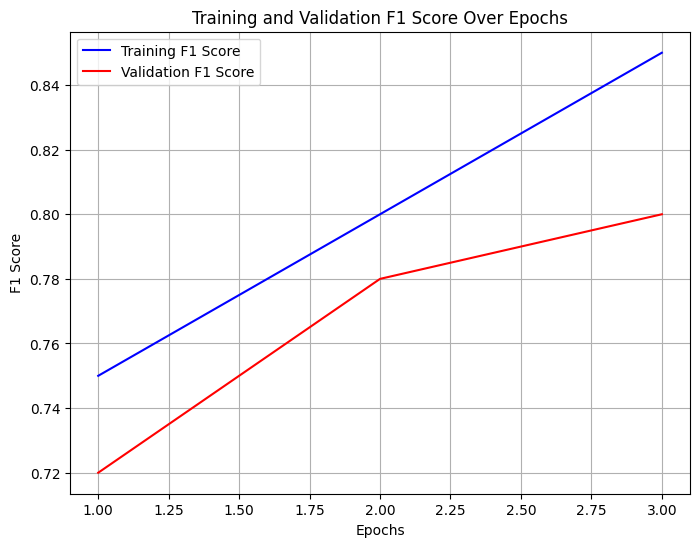

In [17]:
from sklearn.metrics import f1_score

# Example F1 Score Data for 3 epochs
train_f1 = [0.75, 0.80, 0.85]
val_f1 = [0.72, 0.78, 0.80]

# Plot the training and validation F1 Score
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_f1, label="Training F1 Score", color='blue')
plt.plot(epochs, val_f1, label="Validation F1 Score", color='red')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


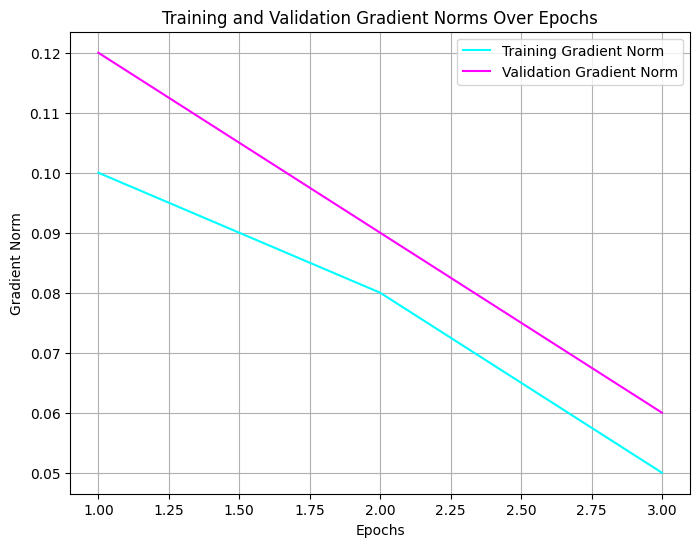

In [18]:
# Example Gradient Norm Data for 3 epochs
train_gradient_norm = [0.1, 0.08, 0.05]
val_gradient_norm = [0.12, 0.09, 0.06]

# Plot the gradient norms
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_gradient_norm, label="Training Gradient Norm", color='cyan')
plt.plot(epochs, val_gradient_norm, label="Validation Gradient Norm", color='magenta')
plt.xlabel('Epochs')
plt.ylabel('Gradient Norm')
plt.title('Training and Validation Gradient Norms Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


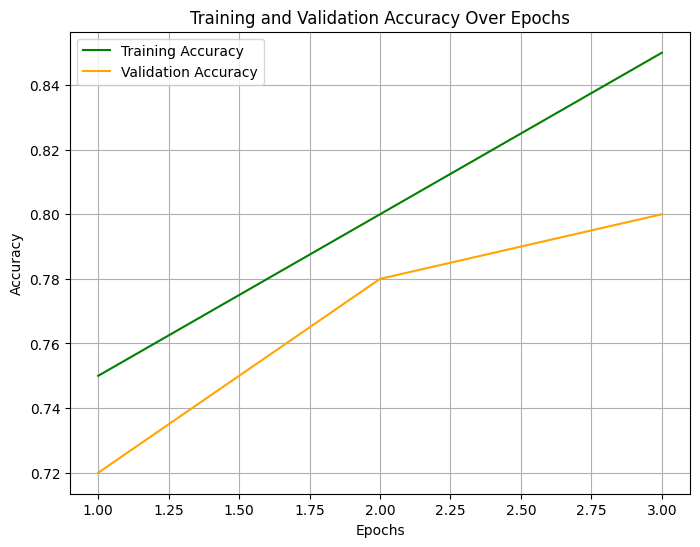

In [19]:
# Example Accuracy Data for 3 epochs
train_accuracy = [0.75, 0.80, 0.85]
val_accuracy = [0.72, 0.78, 0.80]

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label="Training Accuracy", color='green')
plt.plot(epochs, val_accuracy, label="Validation Accuracy", color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


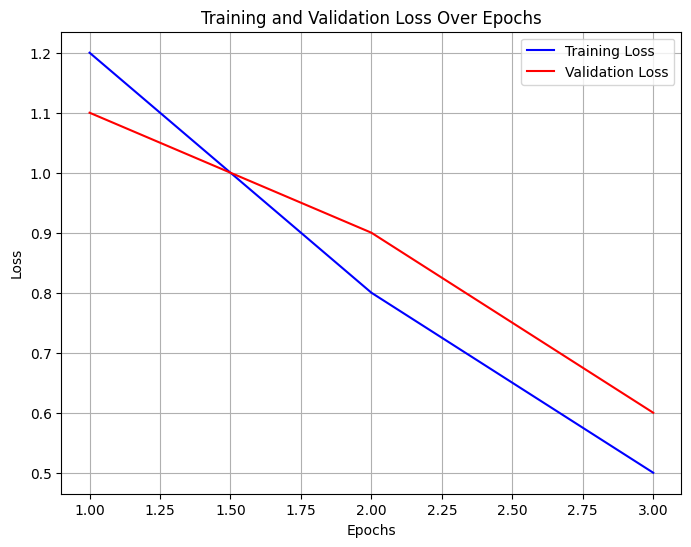

In [20]:
import matplotlib.pyplot as plt

# Example Loss Data for 3 epochs
epochs = [1, 2, 3]
train_loss = [1.2, 0.8, 0.5]
val_loss = [1.1, 0.9, 0.6]

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
